# QSVC

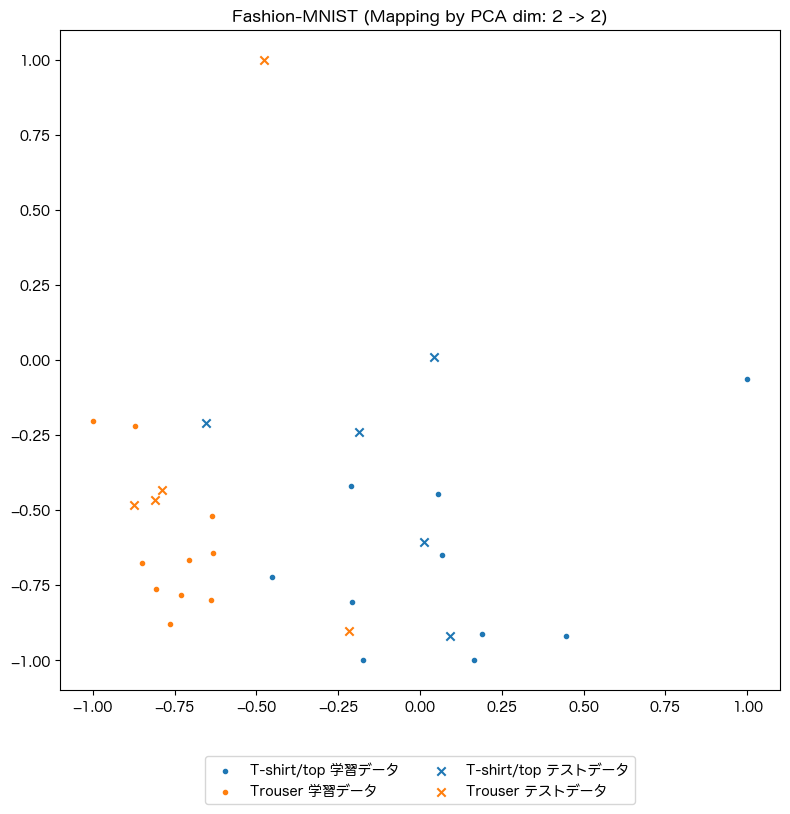

train_acc: 0.95
test_acc: 0.8
predict: ['Trouser' 'Trouser' 'T-shirt/top' 'Trouser' 'Trouser' 'T-shirt/top'
 'Trouser' 'T-shirt/top' 'T-shirt/top' 'T-shirt/top']


In [7]:
from phiqonnect.quantum_algorithm.quantum_ai.classification.qsvc import QSVC
from phiqonnect.quantum_algorithm.circuit.qkernel.mps_qkernel import MPS_QKernel
from phiqonnect.utils.dataset_utils.load_classification_datasets import *
from phiqonnect.utils.visualization.classification_result import *

# データロード
# 現在load_mnist, load_fashion_mnist, load_credit_card, load_breast_cancer. load_wine, load_digits, load_irisが使える
# **paramsを引数で渡す形式でも実行可能
# shuffle=Trueで、データの順序がランダムに
# class_numでクラス数を指定
params = {
    "train_size": 20, 
    "test_size": 10, 
    "test_ration": 0.2,  
    "class_num": 2, 
    "feature_dim": 2,
    "shuffle": True, 
    "plot_data": True,
    "dim_reduction": "pca"
}
training_input, test_input, label_train, label_test, class_label, data, target = load_fashion_mnist(**params)
#training_input, test_input, label_train, label_test, class_label, data, target = load_wine(train_size = 20, test_size=10, test_ration=0.2, feature_dim=4, class_num=2, shuffle=True, plot_data=True)

# get_kernel_matrixメソッドを持ったクラスであれば実行可能、FPGA_MPS_Kernelみたいなのを想定(下部参照)
qkernel = MPS_QKernel(feature_dimension=params["feature_dim"])
# qkernel = FPGA_MPS_Kernel(feature_dimension=2, block_size=2)
# qkernel = IQP2a_QKernel(num_qubits=1, repeated=1)
# qkernel = IQP1b_QKernel(num_qubits=4, repeated=1)

qsvc = QSVC(qkernel, instance="qasm_simulator", shots=params["train_size"]**2)

# instanceに直接QuantumInstanceも指定可能、qasm_simulatorのみ実装済み
# FPGAの場合はinstance, shotsは省略OK
# qsvc = QSVC(qkernel)

#result=Trueでtrainでテストも行う、falseは学習のみ
train_result = qsvc.train(training_input, label_train, result=True, class_label=class_label)
print(f'train_acc: {train_result["accuracy"]}')
test_result = qsvc.test(test_input, label_test, class_label=class_label)
print(f'test_acc: {test_result["accuracy"]}')

predict = qsvc.predict(test_input, class_label=class_label)
print(f'predict: {predict}')

# 下記はカーネル行列を直接渡す場合の例、train, test, predictそれぞれ"_"をつけて呼び出し
# test_kernel_matrix = qsvr.get_kernel_matrix(test_data, train_data)
# test_result = qsvr._test(test_kernel_matrix, test_target)

#モデルのセーブ&ロード
# qsvc.save_model("test_model.pk")
# qsvc2 = QSVC.load_model("test_model.pk")
# qsvc2.test(training_input, label_train)

#train_resultの取得(train時にresult=Trueの必要がある?TODO:検討中)
# qsvc2.get_train_result()

#可視化関連
plot_kernel_matrix(**train_result, title="train", save_file="./train.png", figsize=(6, 6))
plot_kernel_matrix(**test_result, title="test")
plot_confusion_matrix(**train_result, title="train", save_file="./train.png", figsize=(6, 5), class_label=class_label)
plot_confusion_matrix(**test_result, title="test")
ret = dicision_boundary(qsvc, training_input, test_input, label_train, label_test, class_label, distance=0.5, figsize=(5, 5))

# QSVR

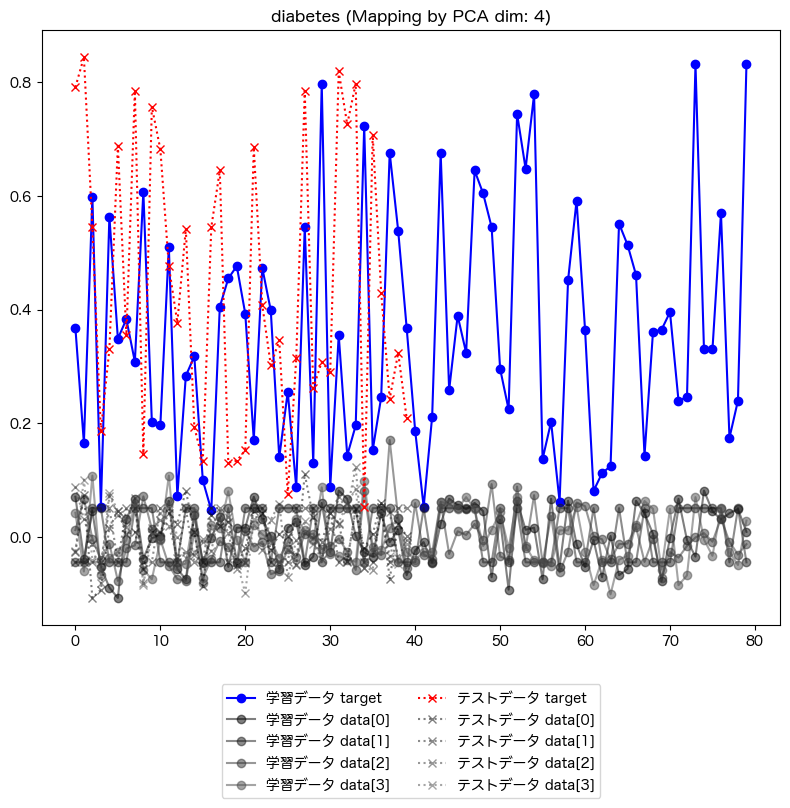

/Users/tsubasa/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train_r2: 0.35173390755389755
train_mae: 0.14073795044079468
train_rmse: 0.16959919023299194
test_r2: 0.290197968274172
test_mae: 0.17285892499478167
test_rmse: 0.20687427391916502
predict: [0.44086973 0.54972273 0.29450628 0.18910609 0.52824549 0.48454595
 0.39939109 0.49735201 0.19747904 0.41392234 0.42393261 0.43898811
 0.35483409 0.29914715 0.31912523 0.32459276 0.33845881 0.41253541
 0.43438587 0.24805357 0.20449602 0.46988298 0.36735984 0.41179174
 0.38752392 0.28312578 0.27086729 0.38965696 0.33696348 0.25860358
 0.42644427 0.46456404 0.4940424  0.59565118 0.26141225 0.29094472
 0.48257281 0.3887172  0.27403875 0.33280284]
predict: [[166.51918204]
 [201.46099591]
 [119.53651651]
 [ 85.70305444]
 [194.56680166]
 [180.53924953]
 [153.20454053]
 [184.64999553]
 [ 88.39077043]
 [157.86907178]
 [161.08236685]
 [165.91518396]
 [138.90174331]
 [121.02623472]
 [127.43919732]
 [129.19427541]
 [133.64527886]
 [157.42386501]
 [164.4378647 ]
 [104.62519756]
 [ 90.64322144]
 [175.83243733]
 

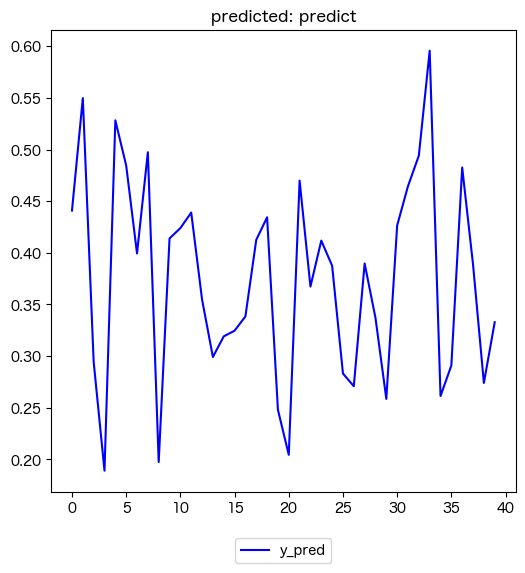

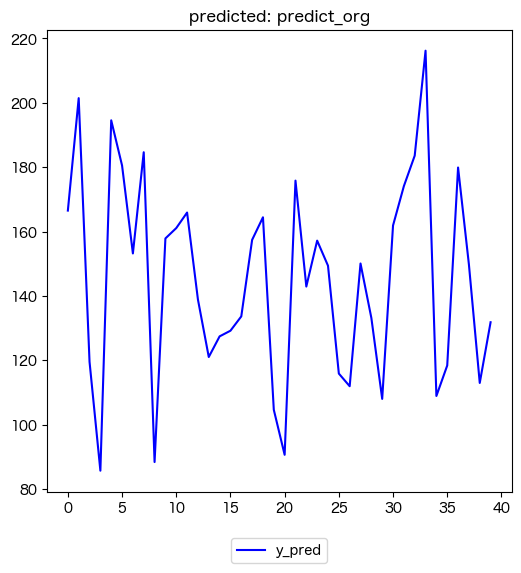

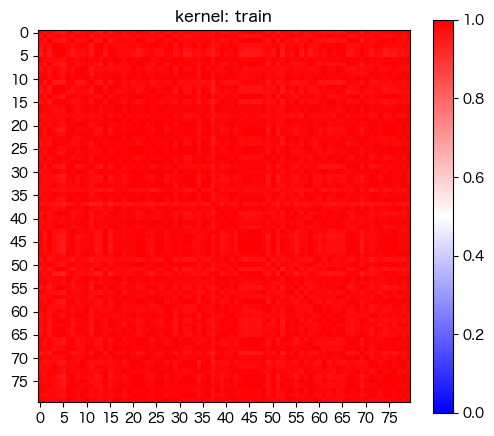

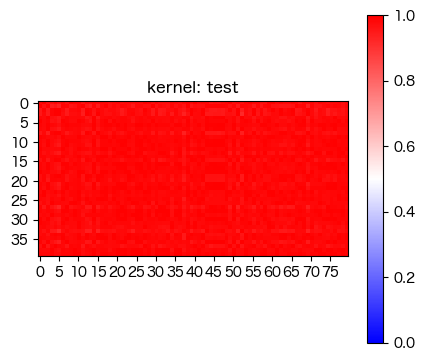

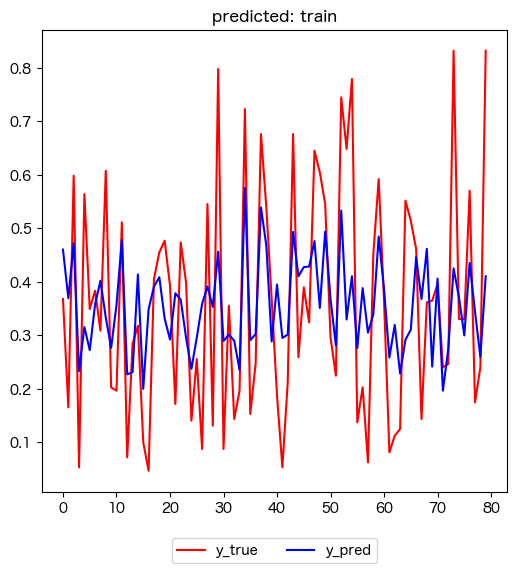

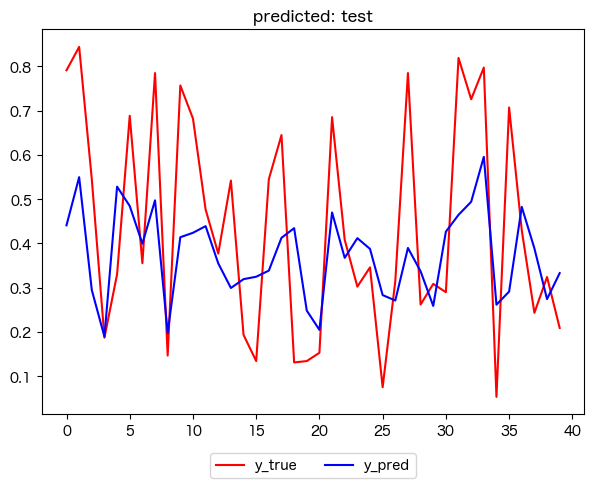

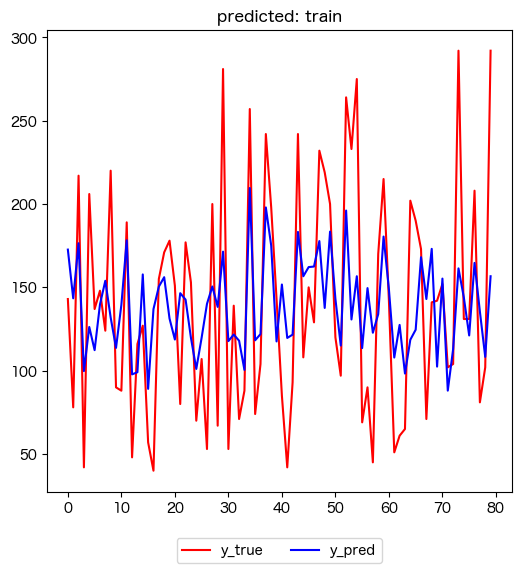

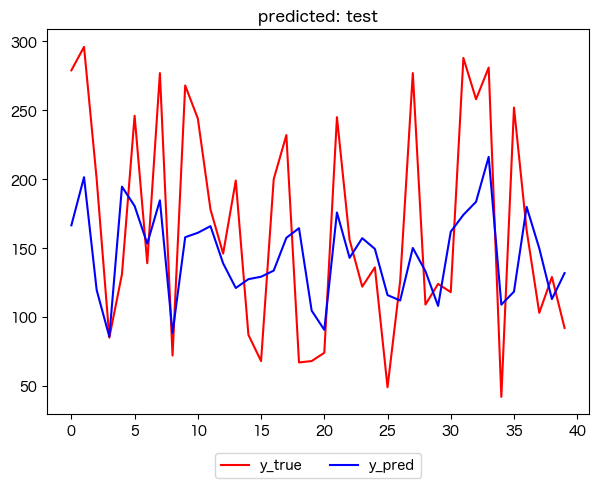

corrcoef: 0.6382969006709506
y = 1.5846945668398038x + -0.2043050704993879


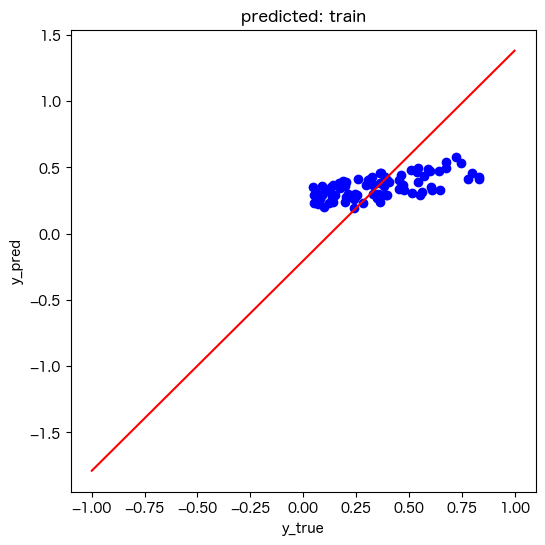

corrcoef: 0.6447955663592378
y = 1.5992915364866556x + -0.16079893154597613


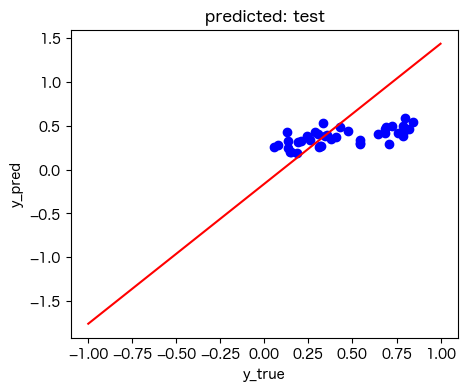

In [8]:
from phiqonnect.quantum_algorithm.quantum_ai.regression.qsvr import QSVR
from phiqonnect.quantum_algorithm.circuit.qkernel.mps_qkernel import MPS_QKernel
from phiqonnect.utils.dataset_utils.load_regression_datasets import *
from phiqonnect.utils.visualization.regression_result import *

params = {
    "train_size": 80, 
    "test_size":40, 
    "test_ration": 0.2, 
    "feature_dim": 4, 
    "shuffle": True, 
    "plot_data": True,
    "dim_reduction": "original" #前処理方法、現在pca, originalのみ
}
train_data, test_data, train_target, test_target, data, target, target_scaler = load_diabetes(**params)

qkernel = MPS_QKernel(feature_dimension=params["feature_dim"])
qsvr = QSVR(qkernel, instance="qasm_simulator", shots=params["train_size"]**2)

train_result = qsvr.train(train_data, train_target, True)
print(f'train_r2: {train_result["r2"]}')
print(f'train_mae: {train_result["mae"]}')
print(f'train_rmse: {train_result["rmse"]}')

test_result = qsvr.test(test_data, test_target, use_support_vector_index=False)
# 下記はカーネル行列を直接渡す場合の例、train, test, predictそれぞれ"_"をつけて呼び出し
# test_kernel_matrix = qsvr.get_kernel_matrix(test_data, train_data)
# test_result = qsvr._test(test_kernel_matrix, test_target)

print(f'test_r2: {test_result["r2"]}')
print(f'test_mae: {test_result["mae"]}')
print(f'test_rmse: {test_result["rmse"]}')

predict = qsvr.predict(test_data, use_support_vector_index=False)
print(f'predict: {predict}')

#正規化したターゲットの値を元のターゲットの値の大きさにスケールを戻す
predict_org = original_target(qsvr.predict(test_data, use_support_vector_index=False), target_scaler)
print(f'predict: {predict_org}')

#可視化関連
plot_predict(predict, title="predict", figsize=(6, 6))
plot_predict(predict_org, title="predict_org", figsize=(6, 6))
plot_kernel_matrix(**train_result, title="train", save_file="./train.png", figsize=(6, 6))
plot_kernel_matrix(**test_result, title="test")
plot_predict(**train_result, title="train", figsize=(6, 6))
plot_predict(**test_result, title="test")
plot_predict(**train_result, target_scaler=target_scaler, title="train", figsize=(6, 6))
plot_predict(**test_result, target_scaler=target_scaler, title="test")
plot_parity_plot(**train_result, title="train", figsize=(6, 6))
plot_parity_plot(**test_result, title="test")

#正規化したターゲットの値を元のターゲットの値の大きさにスケールを戻した結果の取得
# print(original_target_result(target_scaler, **train_result))
# print(original_target_result(target_scaler, **test_result))

# Multiclass-QSVC one vs one

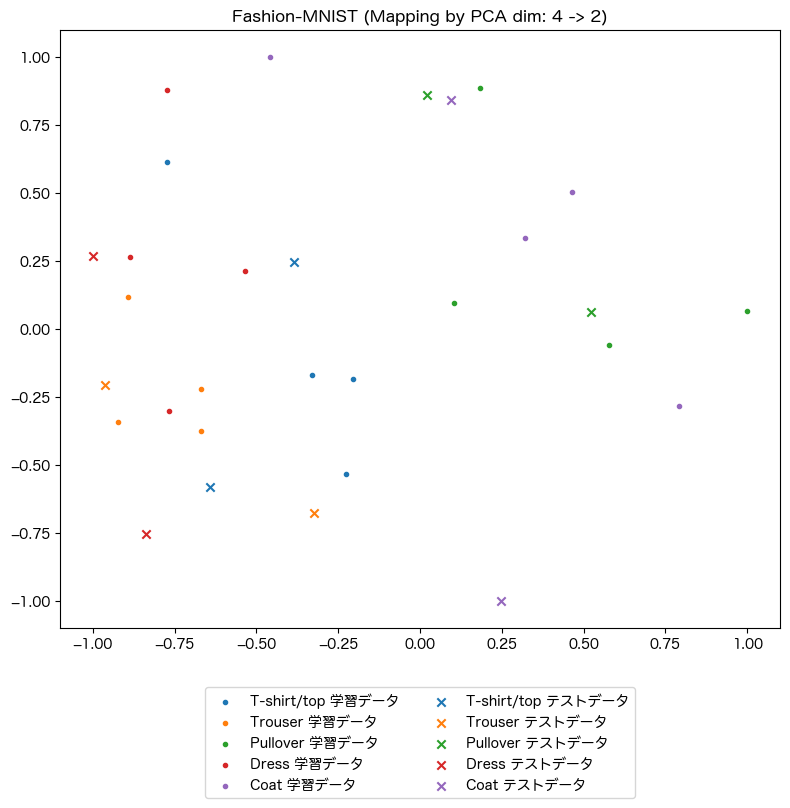

train_acc: 0.65
test_acc: 0.5
predict: ['Trouser' 'Trouser' 'T-shirt/top' 'Coat' 'Trouser' 'T-shirt/top'
 'Pullover' 'Coat' 'T-shirt/top' 'Dress']


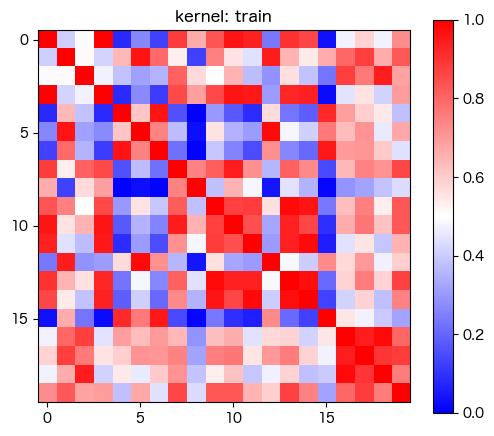

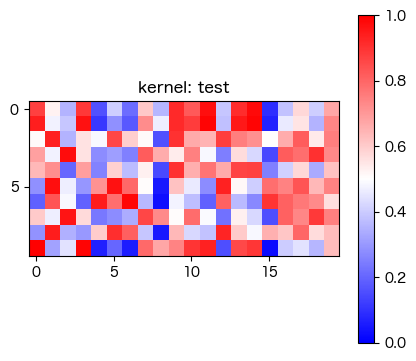

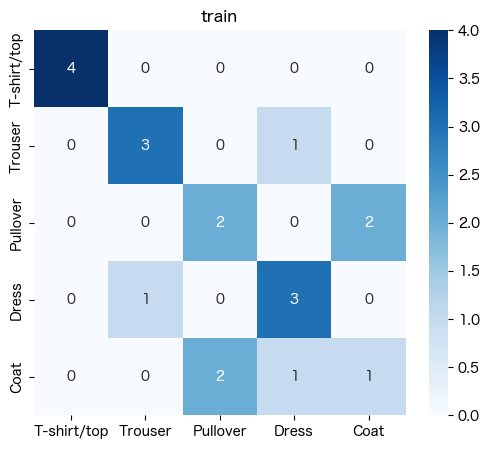

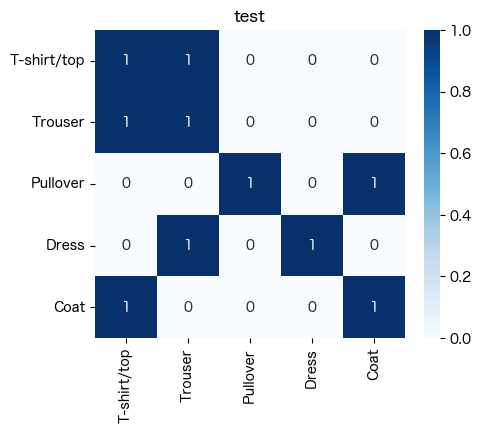

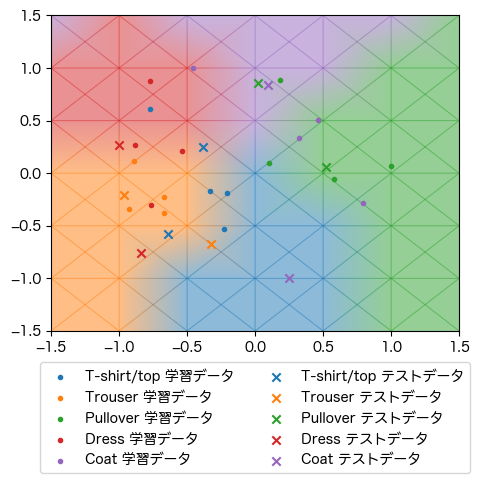

In [10]:
from phiqonnect.quantum_algorithm.quantum_ai.classification.multiclass_qsvc import MulticlassQSVC
from phiqonnect.quantum_algorithm.circuit.qkernel.mps_qkernel import MPS_QKernel
from phiqonnect.utils.dataset_utils.load_classification_datasets import *
from phiqonnect.utils.visualization.classification_result import *

params = {
    "train_size": 20, 
    "test_size": 10, 
    "test_ration": 0.2, 
    "feature_dim": 4, 
    "class_num": 5, 
    "shuffle": True, 
    "plot_data": True
}
training_input, test_input, label_train, label_test, class_label, data, target = load_fashion_mnist(**params)

qkernel = MPS_QKernel(feature_dimension=params["feature_dim"])
qsvc = MulticlassQSVC(qkernel, params["class_num"], "ovo", instance="qasm_simulator", shots=params["train_size"]**2)

train_result = qsvc.train(training_input, label_train, result=True, class_label=class_label)
print(f'train_acc: {train_result["accuracy"]}')

test_result = qsvc.test(test_input, label_test, class_label=class_label)
print(f'test_acc: {test_result["accuracy"]}')

predict = qsvc.predict(test_input, class_label=class_label)
print(f'predict: {predict}')

plot_kernel_matrix(**train_result, title="train", save_file="./train.png", figsize=(6, 6))
plot_kernel_matrix(**test_result, title="test")
plot_confusion_matrix(**train_result, title="train", save_file="./train.png", figsize=(6, 5), class_label=class_label)
plot_confusion_matrix(**test_result, title="test", class_label=class_label)
ret = dicision_boundary(qsvc, training_input, test_input, label_train, label_test, class_label, distance=0.5, figsize=(5, 5))

# Multiclass-QSVC one vs rest

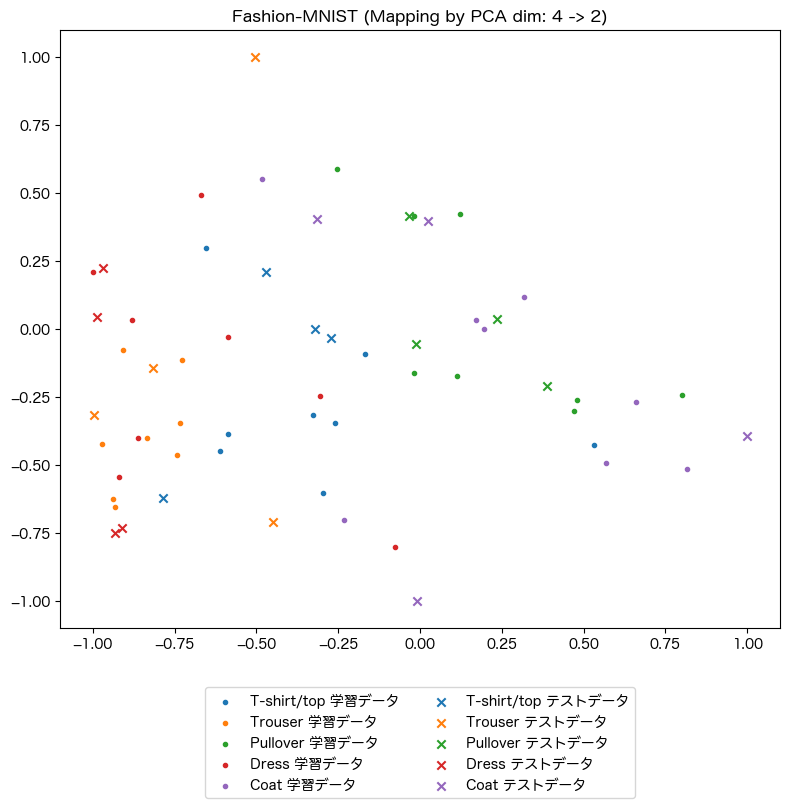

train_acc: 0.775
test_acc: 0.55
predict: ['Pullover' 'Pullover' 'T-shirt/top' 'Coat' 'T-shirt/top' 'T-shirt/top'
 'T-shirt/top' 'Pullover' 'Coat' 'Dress' 'Pullover' 'Dress' 'Trouser'
 'Pullover' 'Trouser' 'Trouser' 'Trouser' 'Trouser' 'Pullover'
 'T-shirt/top']


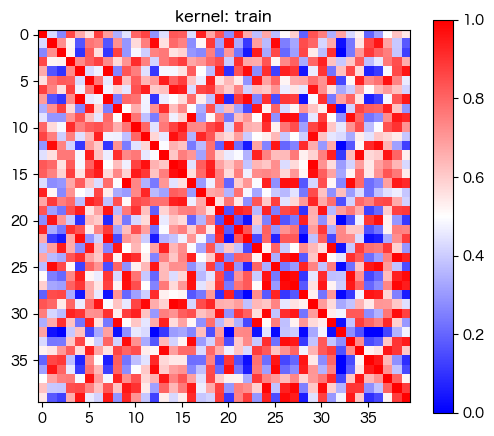

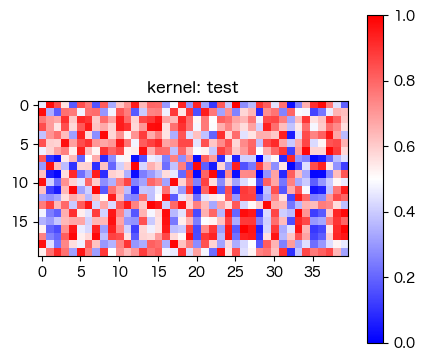

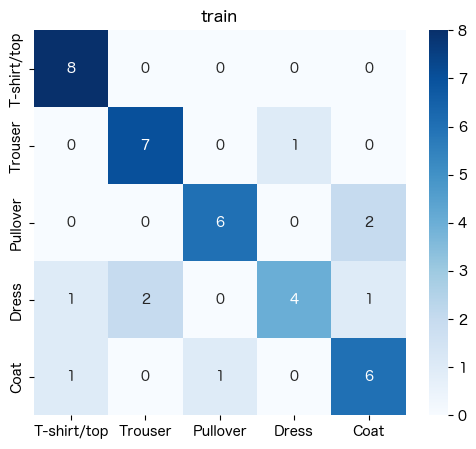

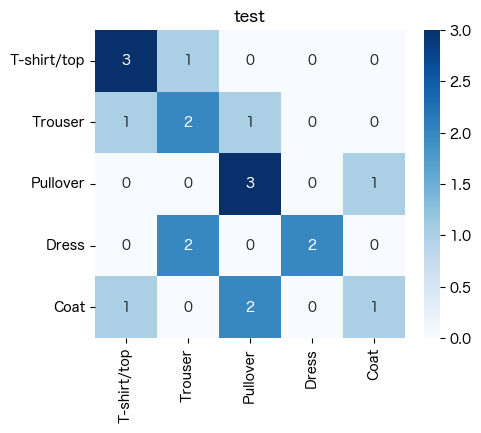

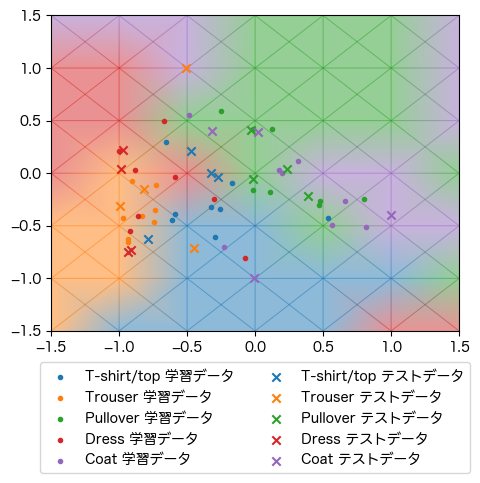

In [11]:
from phiqonnect.quantum_algorithm.quantum_ai.classification.multiclass_qsvc import MulticlassQSVC
from phiqonnect.quantum_algorithm.circuit.qkernel.mps_qkernel import MPS_QKernel
from phiqonnect.utils.dataset_utils.load_classification_datasets import *
from phiqonnect.utils.visualization.classification_result import *

params = {
    "train_size": 40, 
    "test_size": 20, 
    "test_ration": 0.2, 
    "feature_dim": 4, 
    "class_num": 5,
    "shuffle": True, 
    "plot_data": True
}
training_input, test_input, label_train, label_test, class_label, data, target = load_fashion_mnist(**params)

qkernel = MPS_QKernel(feature_dimension=params["feature_dim"])
qsvc = MulticlassQSVC(qkernel, params["class_num"], "ovr", instance="qasm_simulator", shots=params["train_size"]**2)

train_result = qsvc.train(training_input, label_train, result=True, class_label=class_label)
print(f'train_acc: {train_result["accuracy"]}')

test_result = qsvc.test(test_input, label_test, class_label=class_label)
print(f'test_acc: {test_result["accuracy"]}')

predict = qsvc.predict(test_input, class_label=class_label)
print(f'predict: {predict}')

plot_kernel_matrix(**train_result, title="train", save_file="./train.png", figsize=(6, 6))
plot_kernel_matrix(**test_result, title="test")
plot_confusion_matrix(**train_result, title="train", save_file="./train.png", figsize=(6, 5), class_label=class_label)
plot_confusion_matrix(**test_result, title="test", class_label=class_label)
ret = dicision_boundary(qsvc, training_input, test_input, label_train, label_test, class_label, distance=0.5, figsize=(5, 5))

# SVC

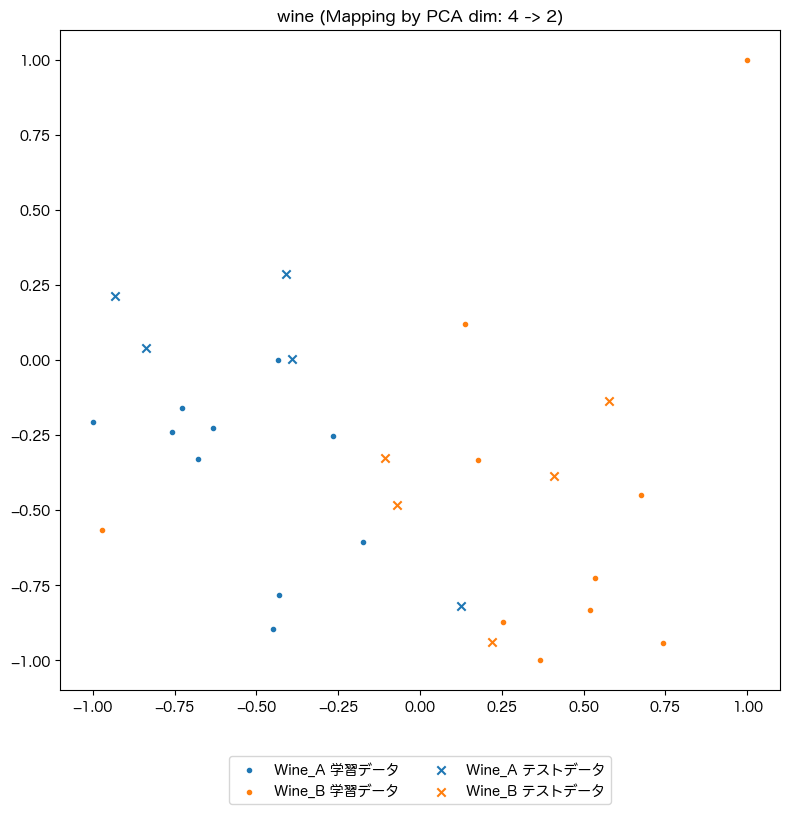

train_acc: 0.95
test_acc: 1.0
predict: ['Wine_B' 'Wine_A' 'Wine_B' 'Wine_A' 'Wine_A' 'Wine_B' 'Wine_B' 'Wine_B'
 'Wine_A' 'Wine_A']


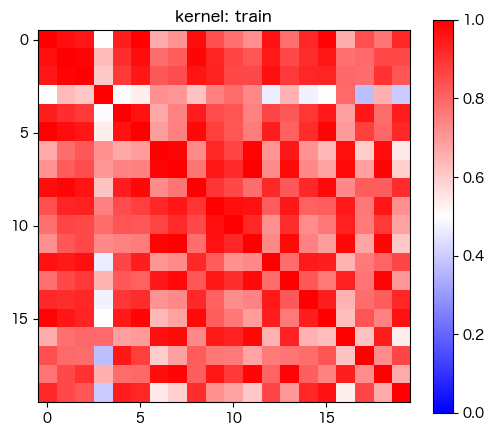

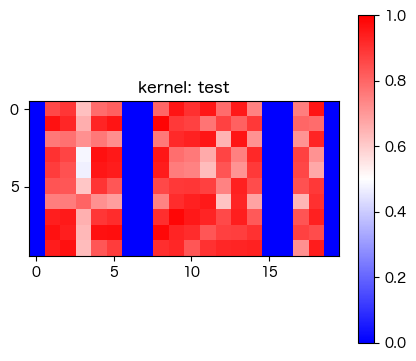

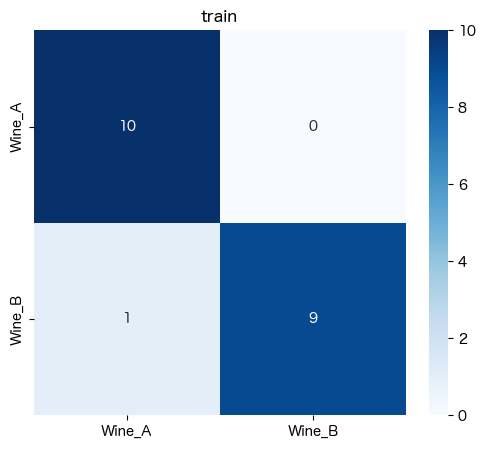

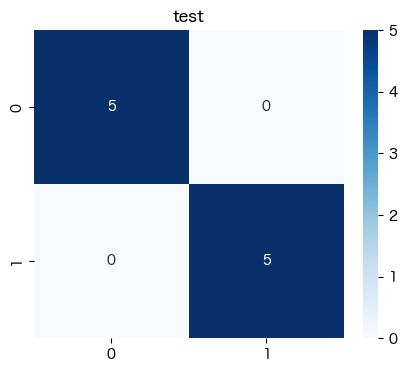

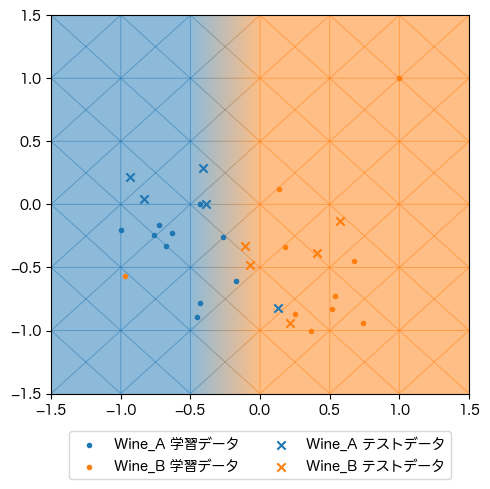

In [14]:
from phiqonnect.classical_algorithm.ai.classification.classical_svc import ClassicalSVC
from sklearn.metrics.pairwise import rbf_kernel

from phiqonnect.utils.dataset_utils.load_classification_datasets import *
from phiqonnect.utils.visualization.classification_result import *

# データロード
# 現在load_mnist, load_fashion_mnist, load_credit_card, load_breast_cancer. load_wine, load_digits, load_irisが使える
# **paramsを引数で渡す形式でも実行可能
# shuffle=Trueで、データの順序がランダムに
# class_numでクラス数を指定
params = {
    "train_size": 20, 
    "test_size":10, 
    "test_ration": 0.2, 
    "feature_dim": 4, 
    "class_num": 2, 
    "shuffle": True, 
    "plot_data": True
}
training_input, test_input, label_train, label_test, class_label, data, target = load_wine(**params)
#training_input, test_input, label_train, label_test, class_label, data, target = load_wine(train_size = 20, test_size=10, test_ration=0.2, feature_dim=4, class_num=2, shuffle=True, plot_data=True)

svc = ClassicalSVC(rbf_kernel)

#result=Trueでtrainでテストも行う、falseは学習のみ
train_result = svc.train(training_input, label_train, result=True, class_label=class_label)
print(f'train_acc: {train_result["accuracy"]}')

test_result = svc.test(test_input, label_test, class_label=class_label)
print(f'test_acc: {test_result["accuracy"]}')

predict = svc.predict(test_input, class_label=class_label)
print(f'predict: {predict}')

# 下記はカーネル行列を直接渡す場合の例、train, test, predictそれぞれ"_"をつけて呼び出し
# test_kernel_matrix = qsvr.get_kernel_matrix(test_data, train_data)
# test_result = qsvr._test(test_kernel_matrix, test_target)

#モデルのセーブ&ロード
# svc.save_model("test_model.pk")
# svc2 = svc.load_model("test_model.pk")
# svc2.test(training_input, label_train)

#train_resultの取得(train時にresult=Trueの必要がある?TODO:検討中)
# svc2.get_train_result()

#可視化関連
plot_kernel_matrix(**train_result, title="train", save_file="./train.png", figsize=(6, 6))
plot_kernel_matrix(**test_result, title="test")
plot_confusion_matrix(**train_result, title="train", save_file="./train.png", figsize=(6, 5), class_label=class_label)
plot_confusion_matrix(**test_result, title="test")
ret = dicision_boundary(svc, training_input, test_input, label_train, label_test, class_label, distance=0.5, figsize=(5, 5))

# SVR

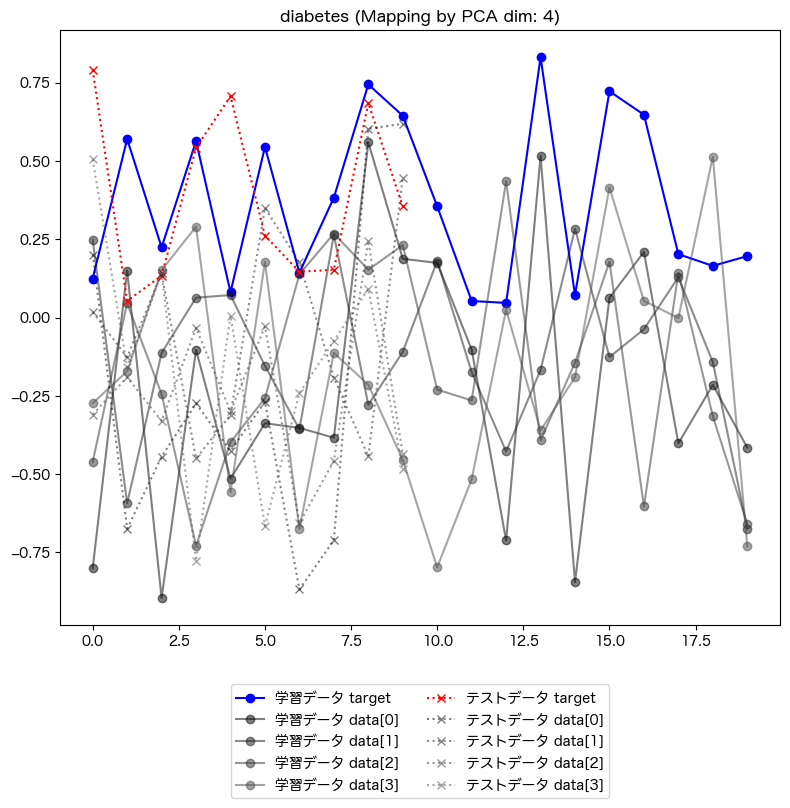

train_r2: 0.6771858463184
train_mae: 0.127765442065694
train_rmse: 0.147600203197279
test_r2: 0.38110947432540354
test_mae: 0.1577018423091411
test_rmse: 0.20574310095251683
predict: [0.58935361 0.18125571 0.31161113 0.26598702 0.29311998 0.29427873
 0.13040118 0.18449297 0.67741359 0.6457674 ]
predict: [[214.18250798]
 [ 83.18308252]
 [125.02717278]
 [110.38183203]
 [119.09151235]
 [119.46347273]
 [ 66.85877785]
 [ 84.22224278]
 [242.44976365]
 [232.29133686]]


/Users/tsubasa/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


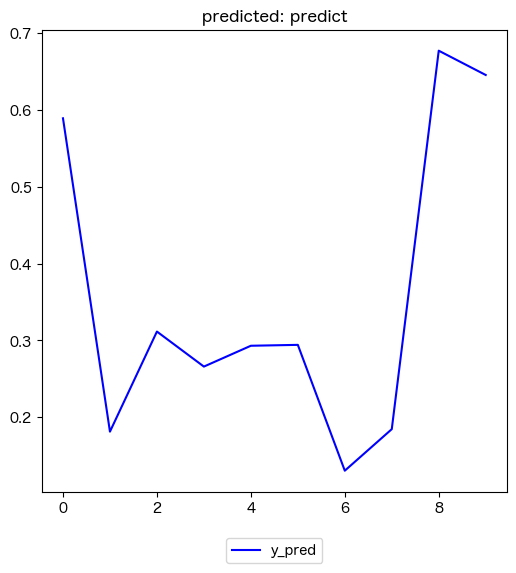

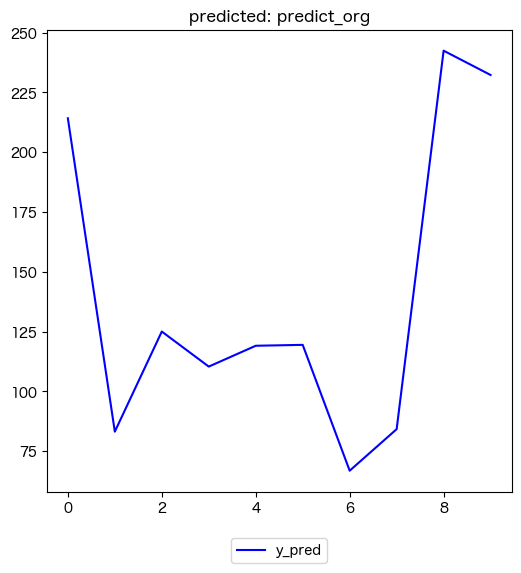

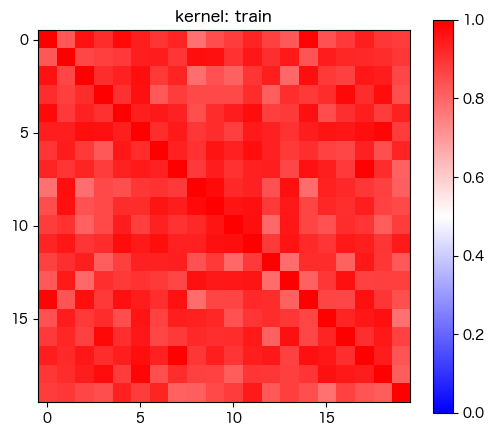

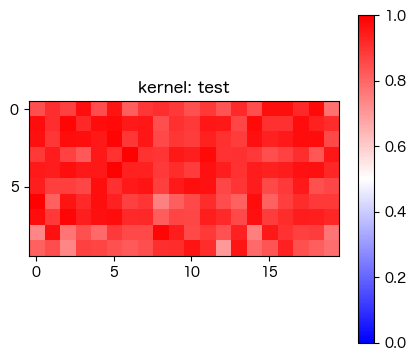

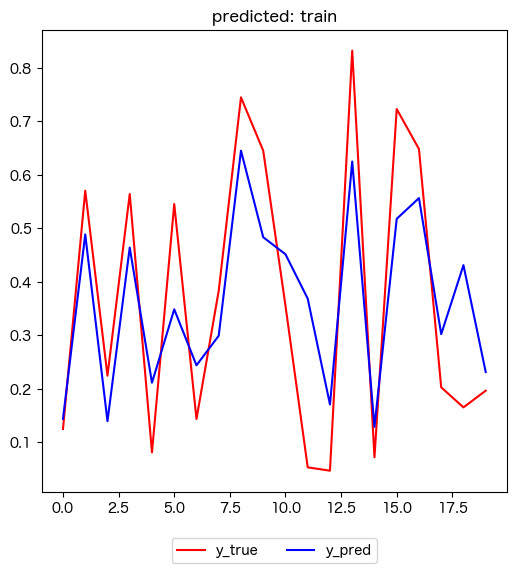

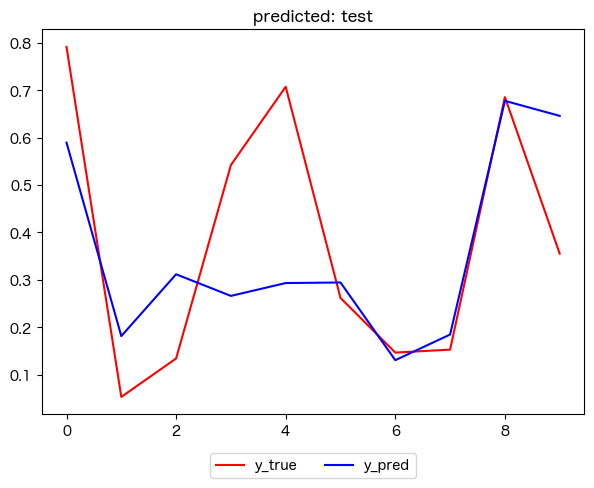

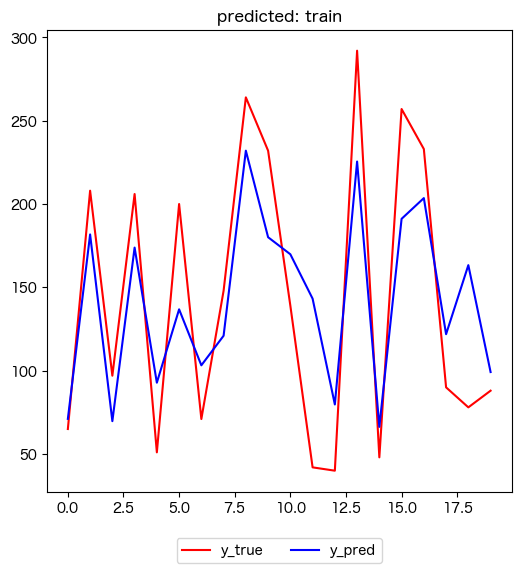

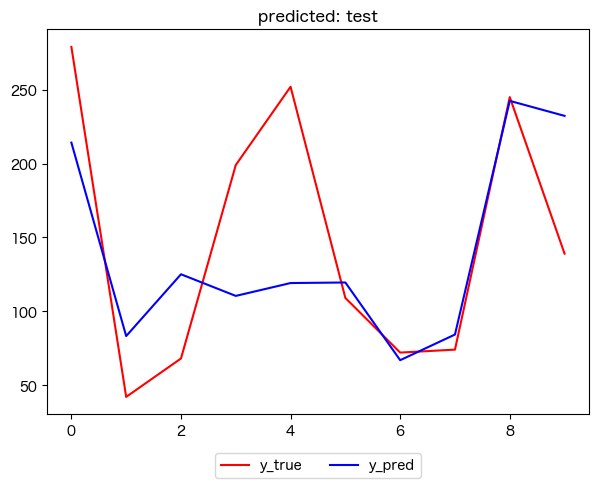

corrcoef: 0.857229229715446
y = 1.3882059893358905x + -0.13706681999630094


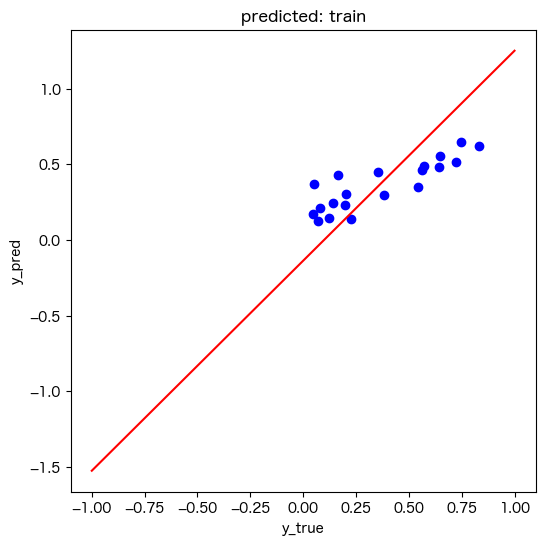

corrcoef: 0.6333474294076423
y = 0.8606603509794357x + 0.07529346228151917


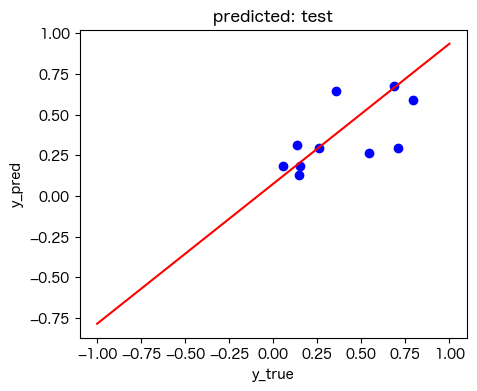

In [3]:
from phiqonnect.classical_algorithm.ai.regression.classical_svr import ClassicalSVR
from sklearn.metrics.pairwise import rbf_kernel

from phiqonnect.utils.dataset_utils.load_regression_datasets import *
from phiqonnect.utils.visualization.regression_result import *

params = {
    "train_size": 20, 
    "test_size":10, 
    "test_ration": 0.2, 
    "feature_dim": 4, 
    "shuffle": True, 
    "plot_data": True,
    "dim_reduction": "pca" #前処理方法、現在pca, originalのみ
}
train_data, test_data, train_target, test_target, data, target, target_scaler = load_diabetes(**params)


def func_rbf_kernel(x, y, gamma=None):
    return rbf_kernel(x, y, gamma=gamma)

svr = ClassicalSVR(func_rbf_kernel)

train_result = svr.train(train_data, train_target, True)
print(f'train_r2: {train_result["r2"]}')
print(f'train_mae: {train_result["mae"]}')
print(f'train_rmse: {train_result["rmse"]}')

test_result = svr.test(test_data, test_target, use_support_vector_index=False)
# 下記はカーネル行列を直接渡す場合の例、train, test, predictそれぞれ"_"をつけて呼び出し
# test_kernel_matrix = svr.get_kernel_matrix(test_data, train_data)
# test_result = svr._test(test_kernel_matrix, test_target)

print(f'test_r2: {test_result["r2"]}')
print(f'test_mae: {test_result["mae"]}')
print(f'test_rmse: {test_result["rmse"]}')

predict = svr.predict(test_data, use_support_vector_index=False)
print(f'predict: {predict}')

#正規化したターゲットの値を元のターゲットの値の大きさにスケールを戻す
predict_org = original_target(svr.predict(test_data, use_support_vector_index=False), target_scaler)
print(f'predict: {predict_org}')

#可視化関連
plot_predict(predict, title="predict", figsize=(6, 6))
plot_predict(predict_org, title="predict_org", figsize=(6, 6))
plot_kernel_matrix(**train_result, title="train", save_file="./train.png", figsize=(6, 6))
plot_kernel_matrix(**test_result, title="test")
plot_predict(**train_result, title="train", figsize=(6, 6))
plot_predict(**test_result, title="test")
plot_predict(**train_result, target_scaler=target_scaler, title="train", figsize=(6, 6))
plot_predict(**test_result, target_scaler=target_scaler, title="test")
plot_parity_plot(**train_result, title="train", figsize=(6, 6))
plot_parity_plot(**test_result, title="test")

#正規化したターゲットの値を元のターゲットの値の大きさにスケールを戻した結果の取得
# print(original_target_result(target_scaler, **train_result))
# print(original_target_result(target_scaler, **test_result))

# Multiclass-SVC one vs one

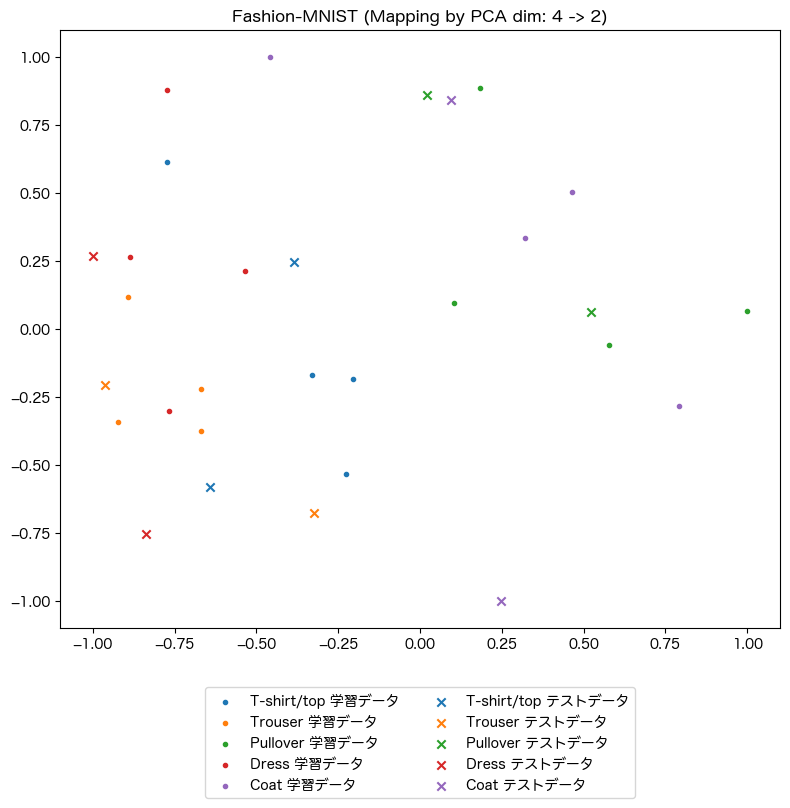

train_acc: 0.65
test_acc: 0.5
predict: ['Coat' 'T-shirt/top' 'Dress' 'Pullover' 'Coat' 'T-shirt/top' 'Trouser'
 'Trouser' 'T-shirt/top' 'Trouser']


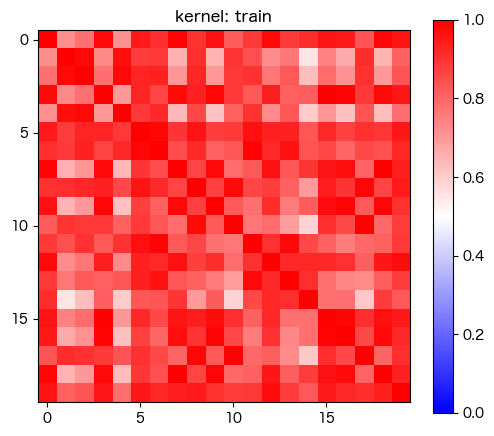

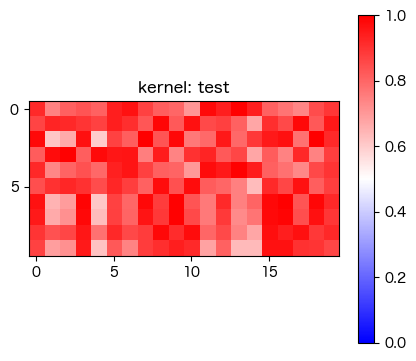

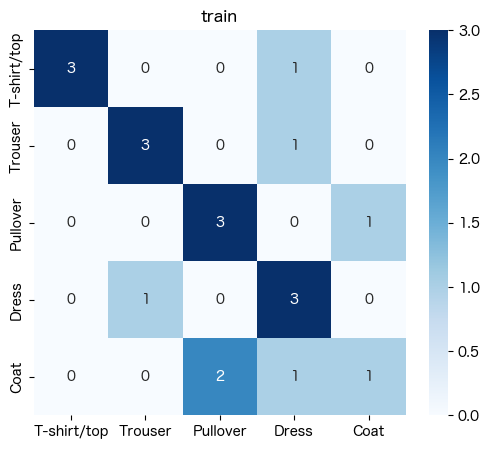

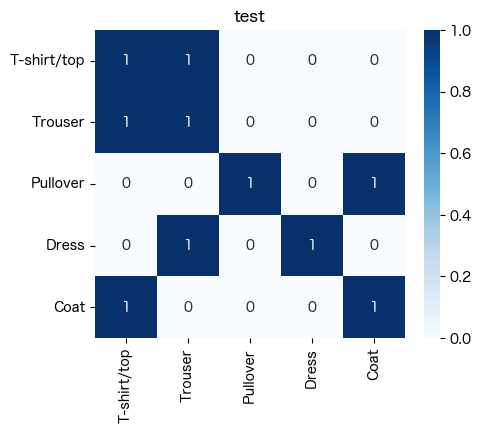

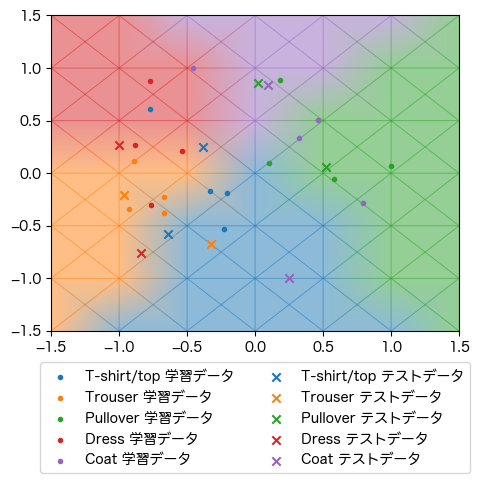

In [18]:
from phiqonnect.classical_algorithm.ai.classification.multiclass_classical_svc import MulticlassClassicalSVC
from sklearn.metrics.pairwise import rbf_kernel

from phiqonnect.utils.dataset_utils.load_classification_datasets import *
from phiqonnect.utils.visualization.classification_result import *

params = {
    "train_size": 20, 
    "test_size": 10, 
    "test_ration": 0.2, 
    "feature_dim": 4, 
    "class_num": 5, 
    "shuffle": True, 
    "plot_data": True
}
training_input, test_input, label_train, label_test, class_label, data, target = load_fashion_mnist(**params)

svc = MulticlassClassicalSVC(rbf_kernel, params["class_num"], "ovo")

train_result = svc.train(training_input, label_train, result=True, class_label=class_label)
print(f'train_acc: {train_result["accuracy"]}')

test_result = svc.test(test_input, label_test, class_label=class_label)
print(f'test_acc: {test_result["accuracy"]}')

predict = svc.predict(test_input, class_label=class_label)
print(f'predict: {predict}')

plot_kernel_matrix(**train_result, title="train", save_file="./train.png", figsize=(6, 6))
plot_kernel_matrix(**test_result, title="test")
plot_confusion_matrix(**train_result, title="train", save_file="./train.png", figsize=(6, 5), class_label=class_label)
plot_confusion_matrix(**test_result, title="test", class_label=class_label)
ret = dicision_boundary(svc, training_input, test_input, label_train, label_test, class_label, distance=0.5, figsize=(5, 5))

# Multiclass-SVC one vs rest

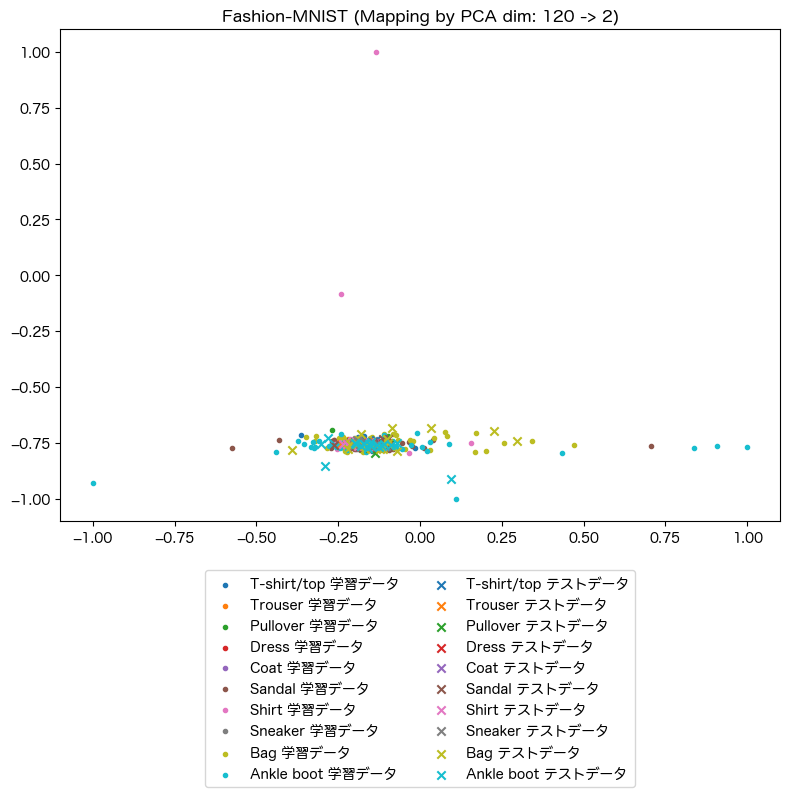

train_acc: 0.817
test_acc: 0.765
predict: ['Coat' 'Ankle boot' 'Coat' 'Pullover' 'Bag' 'Trouser' 'T-shirt/top'
 'Dress' 'Shirt' 'Coat' 'Bag' 'Dress' 'Shirt' 'T-shirt/top' 'Ankle boot'
 'Ankle boot' 'Pullover' 'T-shirt/top' 'Ankle boot' 'Sneaker' 'Sandal'
 'Bag' 'Bag' 'Trouser' 'Sneaker' 'Dress' 'Shirt' 'Ankle boot'
 'T-shirt/top' 'Sneaker' 'Coat' 'Ankle boot' 'Sneaker' 'T-shirt/top'
 'Shirt' 'Shirt' 'Bag' 'Trouser' 'Sneaker' 'Sneaker' 'T-shirt/top' 'Bag'
 'Sneaker' 'Pullover' 'Sandal' 'Pullover' 'Shirt' 'Pullover' 'Coat'
 'Ankle boot' 'T-shirt/top' 'Trouser' 'Pullover' 'Sandal' 'Ankle boot'
 'Coat' 'Trouser' 'Shirt' 'Coat' 'Pullover' 'Ankle boot' 'Sneaker'
 'T-shirt/top' 'Sneaker' 'Sneaker' 'Bag' 'Shirt' 'Trouser' 'Ankle boot'
 'Pullover' 'Ankle boot' 'Trouser' 'Coat' 'Coat' 'Bag' 'Dress' 'Sandal'
 'Shirt' 'Coat' 'Dress' 'Bag' 'Sandal' 'Sneaker' 'Dress' 'Dress'
 'Ankle boot' 'Bag' 'Ankle boot' 'Pullover' 'Sandal' 'Sandal' 'Pullover'
 'Dress' 'Ankle boot' 'Trouser' 'Bag' 'Ankle boot' 'S

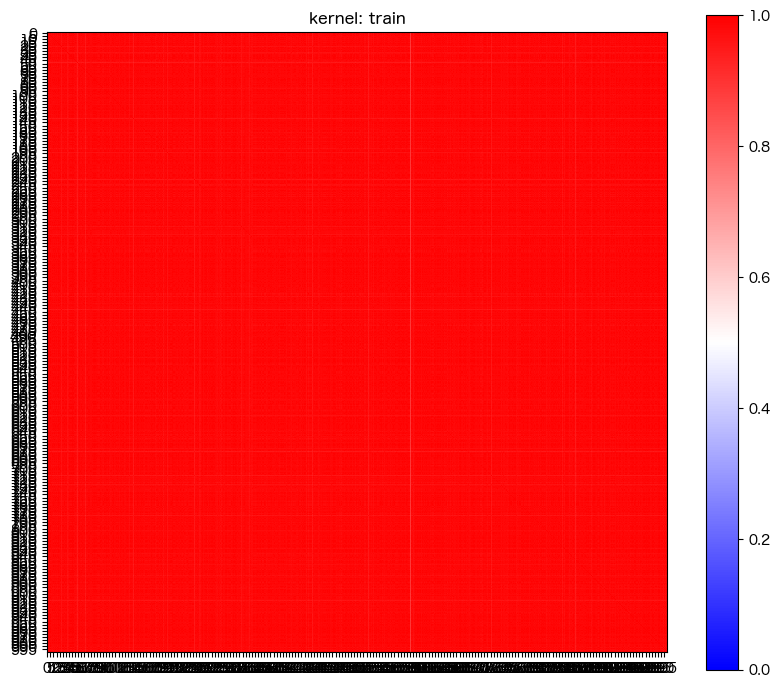

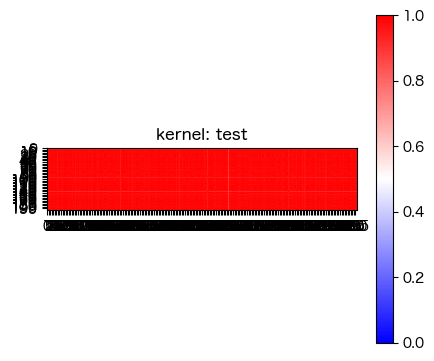

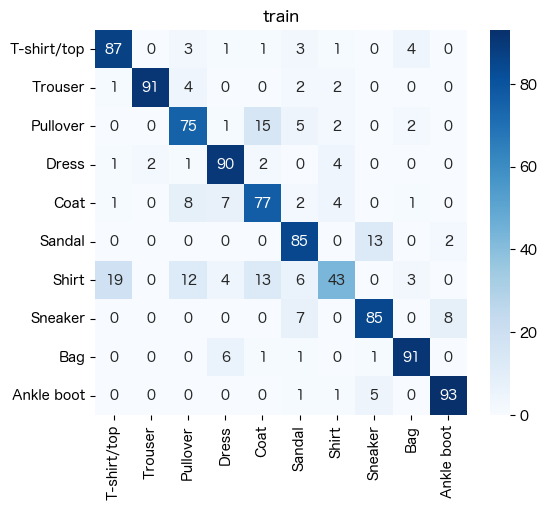

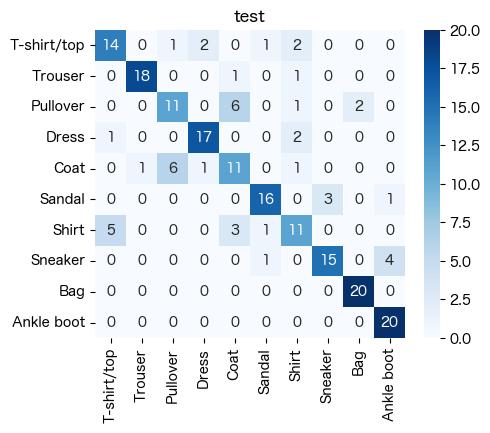

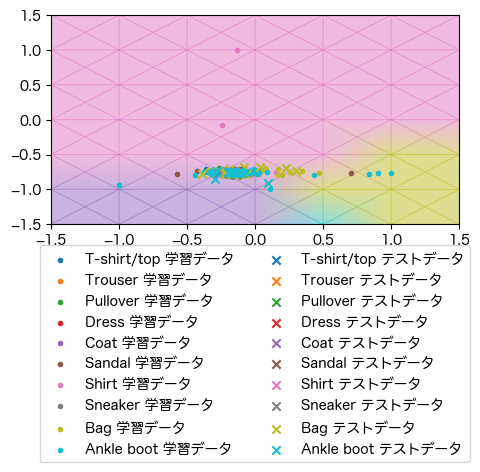

In [19]:
from phiqonnect.classical_algorithm.ai.classification.multiclass_classical_svc import MulticlassClassicalSVC
from sklearn.metrics.pairwise import rbf_kernel

from phiqonnect.utils.dataset_utils.load_classification_datasets import *
from phiqonnect.utils.visualization.classification_result import *

params = {
    "train_size": 1000, 
    "test_size": 200, 
    "test_ration": 0.2, 
    "feature_dim": 120, 
    "class_num": 10, 
    "shuffle": True, 
    "plot_data": True
}
training_input, test_input, label_train, label_test, class_label, data, target = load_fashion_mnist(**params)

svc = MulticlassClassicalSVC(rbf_kernel, params["class_num"], "ovr")

train_result = svc.train(training_input, label_train, result=True, class_label=class_label)
print(f'train_acc: {train_result["accuracy"]}')

test_result = svc.test(test_input, label_test, class_label=class_label)
print(f'test_acc: {test_result["accuracy"]}')

predict = svc.predict(test_input, class_label=class_label)
print(f'predict: {predict}')

plot_kernel_matrix(**train_result, title="train", save_file="./train.png", figsize=(10, 10))
plot_kernel_matrix(**test_result, title="test")
plot_confusion_matrix(**train_result, title="train", save_file="./train.png", figsize=(6, 5), class_label=class_label)
plot_confusion_matrix(**test_result, title="test", class_label=class_label)
ret = dicision_boundary(svc, training_input, test_input, label_train, label_test, class_label, distance=0.5, figsize=(5, 5))

# Braket ローカルシミュレータでQSVC

In [2]:
from phiqonnect.quantum_algorithm.quantum_ai.classification.qsvc import QSVC
from phiqonnect.quantum_algorithm.circuit.qkernel.mps_qkernel import MPS_QKernel
from phiqonnect.utils.dataset_utils.load_classification_datasets import *
from phiqonnect.utils.device.braket_qunatum_instance import BraketQuantumInstance
from phiqonnect.utils.visualization.classification_result import *

training_input, test_input, label_train, label_test, class_label, *_ = load_wine(feature_dim=4, train_size=20, test_size=10)

braketInstance = BraketQuantumInstance(device="simulator", shots=400)
qkernel = MPS_QKernel(feature_dimension=4)
qsvc = QSVC(qkernel, instance=braketInstance)

train_result = qsvc.train(training_input, label_train, result=True, class_label=class_label)
print(f'train_acc: {train_result["accuracy"]}')

test_result = qsvc.test(test_input, label_test, class_label=class_label)
print(f'test_acc: {test_result["accuracy"]}')

predict = qsvc.predict(test_input, class_label=class_label)
print(f'predict: {predict}')

train_acc: 0.95
test_acc: 1.0
predict: ['Wine_A' 'Wine_A' 'Wine_A' 'Wine_A' 'Wine_A' 'Wine_B' 'Wine_B' 'Wine_B'
 'Wine_B' 'Wine_B']
